In [11]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

In [12]:
def I_3a(x):
    return 1/(1 + x*x)

In [5]:
def left_rectangle_method(f, a, b, n):
    h = (b - a) / n
    sum = f(a)
    for i in range(1, n):
        a += h
        sum += f(a)
        
    return sum * h

In [53]:
def tr(f, a, b, n):
    h = (b - a) / n
    sum = 0
    for i in range(0, n):
        a += h
        sum += f((np.float64(a+b))/2.0)
        
    return sum * h

In [86]:
right_rectangle_method = lambda f, a, b: f(b)
left_rectangle_method = lambda f, a, b: f(a)
mean_method = lambda f,a,b: f((a+b)/2.0)
simpson_method = lambda f, a, b: (f(a) + 4 * f((a+b)/2) + f(b)) / 6.0
trapezoidal_method = lambda f, a, b: (f(a) + f(b)) / 2.0


def integration_function(f, a, b, strategy, N=2**9):
    
    step = (b - a) / N
    left = a
    right = a + step
    _sum = 0
    
    for i in range(N):
        _sum += strategy(f, left, right)
        left += step
        right += step
    return _sum * step

In [87]:
def check_precision(func, a, b, N):
    
    true_result = np.pi/2
    #print(f"integral value: {true_result[0]}, precision: {true_result[1]}\n")
    #true_result = true_result[0]


    number_of_partitions = []
    
    lrm_errors = []
    rrm_errors = []
    mm_errors = []
    tr_errors = []
    s_errors = []

    n = 0
    print('+-----+-----------------------+-----------+------------------------+-----------+-------------+-----------+')
    print('|  N  | left_rectangle_method |   error   | right_rectangle_method |   error   | mean_method |   error   |')
    print('+-----+-----------------------+-----------+------------------------+-----------+-------------+-----------+')
    for i in range(N):
        n += 10
        number_of_partitions.append(n)
    
        int_lrm = integration_function(func, a, b, left_rectangle_method, n)
        err_lrm = abs(int_lrm - true_result)
        lrm_errors.append(err_lrm)
    
        int_rrm = integration_function(func, a, b, right_rectangle_method, n)
        err_rrm = abs(int_rrm - true_result)
        rrm_errors.append(err_rrm)

        int_mm = integration_function(func, a, b, mean_method, n)
        err_mm = abs(int_mm - true_result)
        mm_errors.append(err_mm)
        
        print(f'| {n:^3} | {int_lrm:^21.6g} | {err_lrm:^9.3e} | {int_rrm:^22.6g} | {err_rrm:^9.3e} | {int_mm:^11.6g} | {err_mm:^9.3e} |')
    n = 0
    print('+-----+-----------------------+-----------+------------------------+-----------+-------------+-----------+')
    
    print('+-----+------------------------+-----------+--------------------+-----------+')
    print('|  N  |   trapezoidal_method   |   error   |   simpson_method   |   error   |')
    print('+-----+------------------------+-----------+--------------------+-----------+')
    for i in range(N):
        n += 10

        int_tr = integration_function(func, a, b, trapezoidal_method, n)
        err_tr = abs(int_tr - true_result)
        tr_errors.append(err_tr)

        
        int_s = integration_function(func, a, b, simpson_method, n)
        err_s = abs(int_s - true_result)
        s_errors.append(err_s)
        print(f'| {n:^3} |   {int_tr:^{len('trapezoidal_method')}.6g}   |{err_tr:^11.3e}|\
   {int_s:^{len('simpson_method')}.6g}   |{err_s:^11.3e}|')
    print('+-----+------------------------+-----------+--------------------+-----------+')
    
    plt.plot(number_of_partitions, lrm_errors, label='left_rectangle_method')
    plt.plot(number_of_partitions, rrm_errors, label='right_rectangle_method')
   
    '''          
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.show()'''

        
    plt.plot(number_of_partitions, mm_errors, label='mean_method')    
    plt.plot(number_of_partitions, tr_errors, label='trapezoidal')
    plt.plot(number_of_partitions, s_errors, label='simpson')
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

+-----+-----------------------+-----------+------------------------+-----------+-------------+-----------+
|  N  | left_rectangle_method |   error   | right_rectangle_method |   error   | mean_method |   error   |
+-----+-----------------------+-----------+------------------------+-----------+-------------+-----------+
| 10  |        1.56746        | 3.333e-03 |        1.56746         | 3.333e-03 |   1.57246   | 1.667e-03 |
| 20  |        1.56996        | 8.333e-04 |        1.56996         | 8.333e-04 |   1.57121   | 4.167e-04 |
| 30  |        1.57043        | 3.704e-04 |        1.57043         | 3.704e-04 |   1.57098   | 1.852e-04 |
| 40  |        1.57059        | 2.083e-04 |        1.57059         | 2.083e-04 |   1.5709    | 1.042e-04 |
| 50  |        1.57066        | 1.333e-04 |        1.57066         | 1.333e-04 |   1.57086   | 6.667e-05 |
| 60  |        1.5707         | 9.259e-05 |         1.5707         | 9.259e-05 |   1.57084   | 4.630e-05 |
| 70  |        1.57073        | 6.803

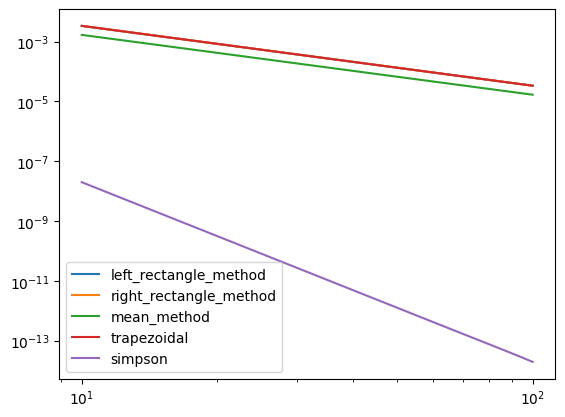

In [90]:
check_precision(I_3a, -1, 1, 10)

In [94]:
def erf(x):
    return (2 / np.sqrt(np.pi)) *integration_function(lambda t: np.exp(-t**2), 0, x, simpson_method, 100)

In [95]:
erf(1)

np.float64(0.8427007929554804)